In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'errorbar.capsize':8})

time_measurements_df = pd.read_excel('Time_measurements.xlsx',\
                                   header=0, usecols='A:J', \
                                   dtype='float32', nrows=12)
time_measurements_df.reset_index(drop=True, inplace=True)

In /home/gkoffas/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/gkoffas/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/gkoffas/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/gkoffas/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/gkoffas/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
time_measurements_df.describe()

,original,loop_interchange_good,loop_interchange_bad,loop_unrolling_bad,loop_unrolling_good,loop_fusion,function_inlining,common_subexpression_elimination,strength_reduction,compiler_help
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3.371417,2.265296,3.963897,2.534290,1.648660,1.949848,0.754684,0.686784,0.668530,0.675797
std,0.072199,0.018583,0.163976,0.039567,0.003430,0.016168,0.001690,0.002509,0.002551,0.001969
min,3.308760,2.250660,3.651260,2.473650,1.644860,1.938070,0.752914,0.683058,0.665412,0.673718
25%,3.336890,2.252275,3.879858,2.505820,1.646302,1.941762,0.753608,0.685299,0.667066,0.674496
50%,3.342285,2.262490,3.973535,2.532555,1.647220,1.946170,0.753922,0.686255,0.667802,0.675216
75%,3.374980,2.267957,4.014920,2.551755,1.651097,1.950060,0.755670,0.688046,0.669682,0.676891
max,3.579100,2.317050,4.299220,2.604800,1.655260,1.998490,0.758599,0.691337,0.674082,0.680537


/home/gkoffas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


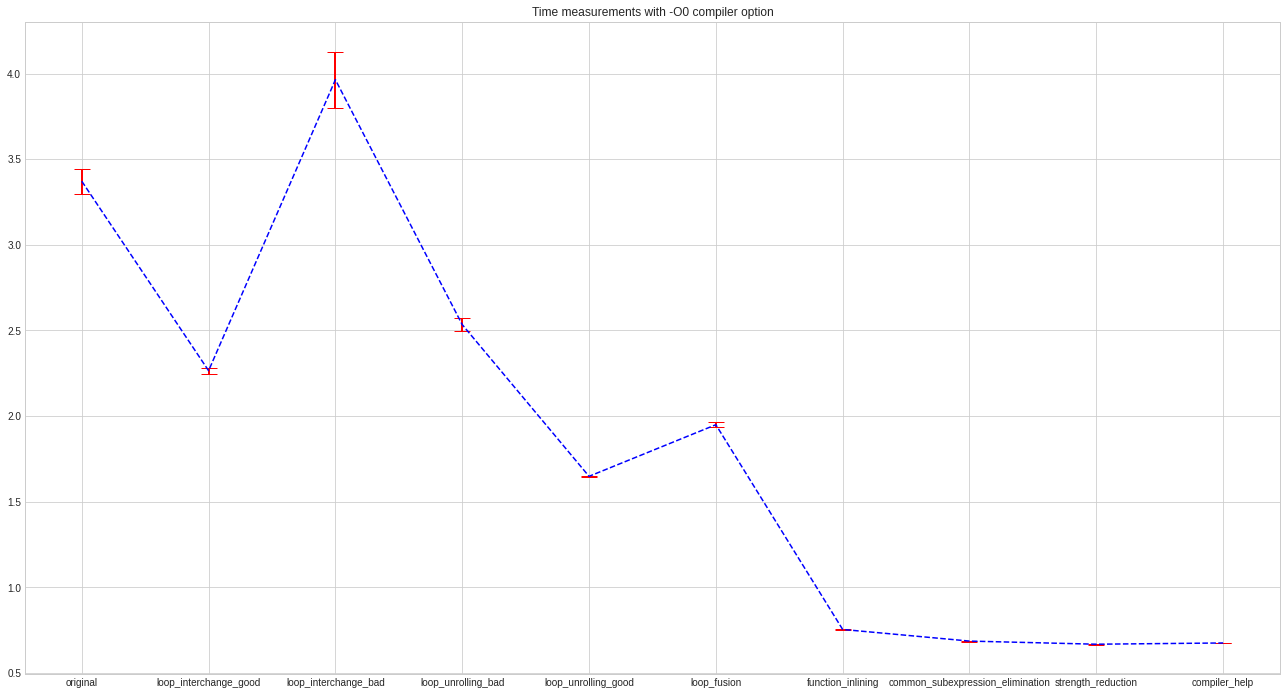

In [3]:
mean_list = []
std_list = []

for col in time_measurements_df.columns:
    temp_S = time_measurements_df.loc[:][col]
    mean_list.append(temp_S.describe(include='all').loc['mean'])
    std_list.append(temp_S.describe(include='all').loc['std'])

metrics_df = pd.DataFrame({'mean' : mean_list, \
                           'std' : std_list})
metrics_df.reset_index(inplace=True)

metrics_df

fig = plt.figure(figsize=(22.5,12))
plt.style.use('seaborn-whitegrid')
plt.errorbar(metrics_df.index, metrics_df['mean'].values, fmt='b--', yerr=metrics_df['std'].values, \
             ecolor='r', elinewidth=2, capsize=8)
plt.xticks(range(len(metrics_df.index)))
plt.axes().set_xticklabels(time_measurements_df.columns)
plt.title('Time measurements with -O0 compiler option')
plt.show()

In [4]:
time_measurements_fast_df = pd.read_excel('Time_measurements.xlsx',\
                                   header=0, usecols='K:T', \
                                   dtype='float32', nrows=12)
time_measurements_fast_df.reset_index(drop=True, inplace=True)

In [5]:
time_measurements_fast_df.describe()

,original_fast,loop_interchange_fast_good,loop_interchange_fast_bad,loop_unrolling_fast_bad,loop_unrolling_fast_good,loop_fusion_fast,function_inlining_fast,common_subexpression_elimination_fast,strength_reduction_fast,compiler_help_fast
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.928118,0.062240,0.065134,0.069751,0.047771,0.051450,0.038515,0.038809,0.031992,0.039639
std,0.019568,0.005964,0.004978,0.002907,0.001711,0.001883,0.001327,0.001680,0.001356,0.001824
min,0.903001,0.055701,0.057943,0.064612,0.046794,0.050092,0.037581,0.037351,0.030700,0.037452
25%,0.917099,0.057350,0.061837,0.067714,0.046840,0.050268,0.037721,0.037621,0.030911,0.037653
50%,0.923755,0.061611,0.064219,0.070401,0.047002,0.050595,0.038024,0.037786,0.031072,0.040623
75%,0.935725,0.063827,0.067036,0.071772,0.047460,0.051596,0.038406,0.040611,0.033186,0.041171
max,0.975362,0.073428,0.077211,0.073762,0.051771,0.055452,0.041293,0.041410,0.034144,0.041597


/home/gkoffas/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


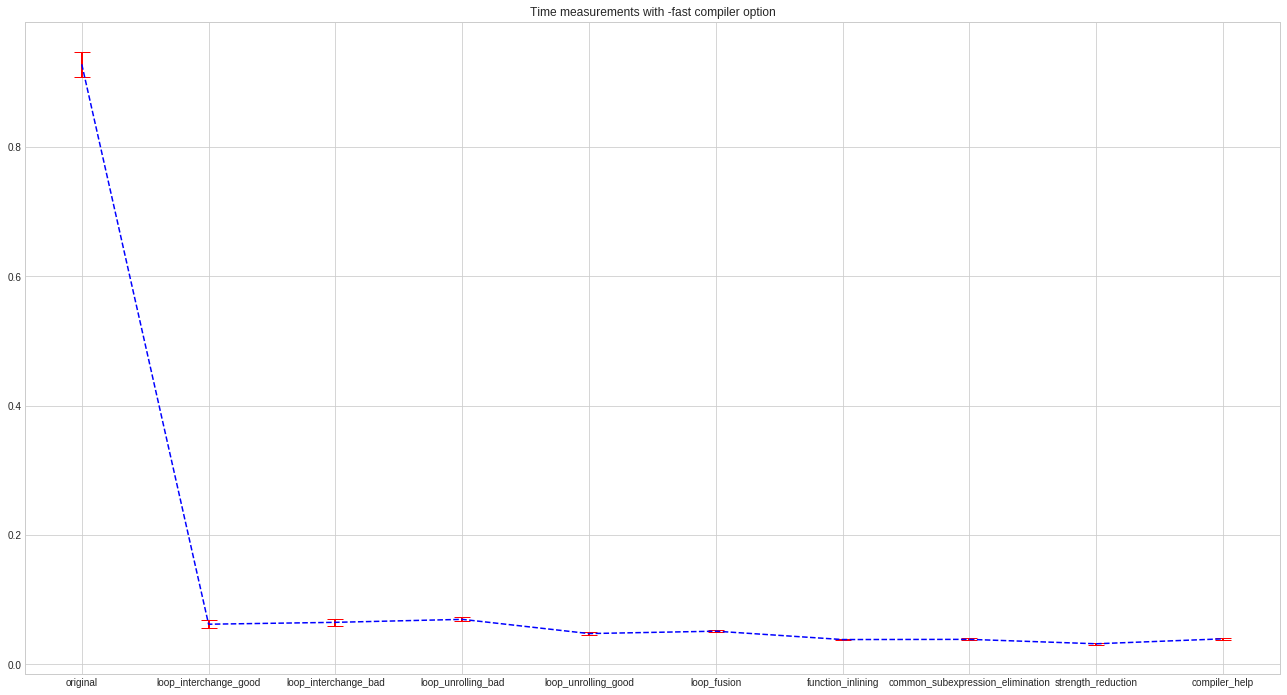

In [6]:
mean_list = []
std_list = []

for col in time_measurements_fast_df.columns:
    temp_S = time_measurements_fast_df.loc[:][col]
    mean_list.append(temp_S.describe(include='all').loc['mean'])
    std_list.append(temp_S.describe(include='all').loc['std'])

metrics_df = pd.DataFrame({'mean' : mean_list, \
                           'std' : std_list})
metrics_df.reset_index(inplace=True)

fig = plt.figure(figsize=(22.5,12))
plt.errorbar(metrics_df.index, metrics_df['mean'].values, fmt='b--', yerr=metrics_df['std'].values, \
             ecolor='r', elinewidth=2, capsize=8)
plt.xticks(range(len(metrics_df.index)))
plt.axes().set_xticklabels(time_measurements_df.columns)
plt.title('Time measurements with -fast compiler option')
plt.show()